In [1]:
import numpy as np
import cv2
import sys

In [5]:
#이미지 밝기조절 트랙바
def call_trackbar(pos):
    img[:]=(img1*(pos/255.)).astype(np.uint8)
    cv2.imshow('image',img)
img = cv2.imread('fig/field.bmp',0)
if img is None:
    print('image read failed')
    sys.exit(1)
    
img1=img.copy()
cv2.imshow('image',img)
cv2.createTrackbar('level','image',0,255,call_trackbar)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
import numpy as np
import cv2
import sys

In [4]:
import numpy as np
import cv2

def call_mouse(event, x, y, flag, param):
    global oldx, oldy, img
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flag == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 5, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y

img = np.ones((600, 600, 3), np.uint8) * 255

img1 = img.copy()
cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse)

while True:
    key = cv2.waitKey(1)
    if key == 27:
        break
    elif key == ord('s'):
        print('saved image')
        cv2.imwrite('image.jpg', img)
    elif key == ord('r'):
        img = img1.copy()
        cv2.imshow('image', img)

cv2.destroyAllWindows()


In [11]:
import cv2
import sys

cap = cv2.VideoCapture(0)  # Change 0 to the video file path if you want to read from a file

if not cap.isOpened():
    print('error')
    sys.exit(1)

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output_0414.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('error')
        break
    
    cv2.imshow('frame', frame)
    out.write(frame)
    
    key = cv2.waitKey(20)
    if key == 27:
        break

out.release()
cap.release()
cv2.destroyAllWindows()


In [35]:
img=np.full((600,800,3),(255,255,255),np.uint8)
cv2.line (img,(100,100),(300,200),(0,0,255),3,cv2.LINE_AA)
cv2.arrowedLine(img,(300,200),(300,400),(0,0,255),3,cv2.LINE_AA)
cv2.rectangle (img,(100,400),(200,500),(0,0,255),-1,cv2.LINE_AA)
cv2.rectangle (img,(120,420,60,60),(128,50,255),-1,cv2.LINE_AA)
cv2.circle (img,(600,300),100,(123,123,0),-1,cv2.LINE_AA)
cv2.ellipse(img,(200,300),(30,100),-90,0,180,(255,0,0),-1,cv2.LINE_AA)
cv2.putText(img,'Go home',(20,300),cv2.FONT_HERSHEY_SIMPLEX,5,(0,243,222),3,cv2.LINE_AA)
pts=np.array([[250,200],[350,300],[350,200],[250,300]])
cv2.polylines(img,[pts],True,(255,0,0),5,cv2.LINE_AA)


cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [42]:
#가우시안 블러필터  타임으로 보면서 해줄수있다.
import time
img=cv2.imread('fig/puppy.bmp',0)
t1=time.time()
# t1.start()
for _ in range(10):
    img = cv2.GaussianBlur(img,(0,0),4)#숫자가 높아질수록 블러처리가 많이된다.
t2=time.time()
cv2.imshow('image',img)
print('time=',round((t2-t1)*1000,3),'ms')
cv2.waitKey()
cv2.destroyAllWindows()

time= 8.005 ms


In [1]:
#여기서부터 새로배우는거 
#영상의 화소점 처리
import cv2
import numpy as np
import sys


In [9]:
src=cv2.imread('lenna.bmp',0)
dst=np.clip(src+100.,0,255).astype(np.uint8) #밝기 100 올리기
dst=cv2.add(src,100) #2번쨰 방법
print(dst.dtype)
if src is None:
    print('error')
    sys.exit(1)
    
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

uint8


In [11]:
src=cv2.imread('lenna.bmp',1) #컬러 100을 더했을떄는 블루 채널에만 
dst=np.clip(src+100.,0,255).astype(np.uint8) #밝기 100 올리기
dst=cv2.add(src,(100,100,100,0)) #bgr +alpha
print(dst.dtype)
if src is None:
    print('error')
    sys.exit(1)
    
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

uint8


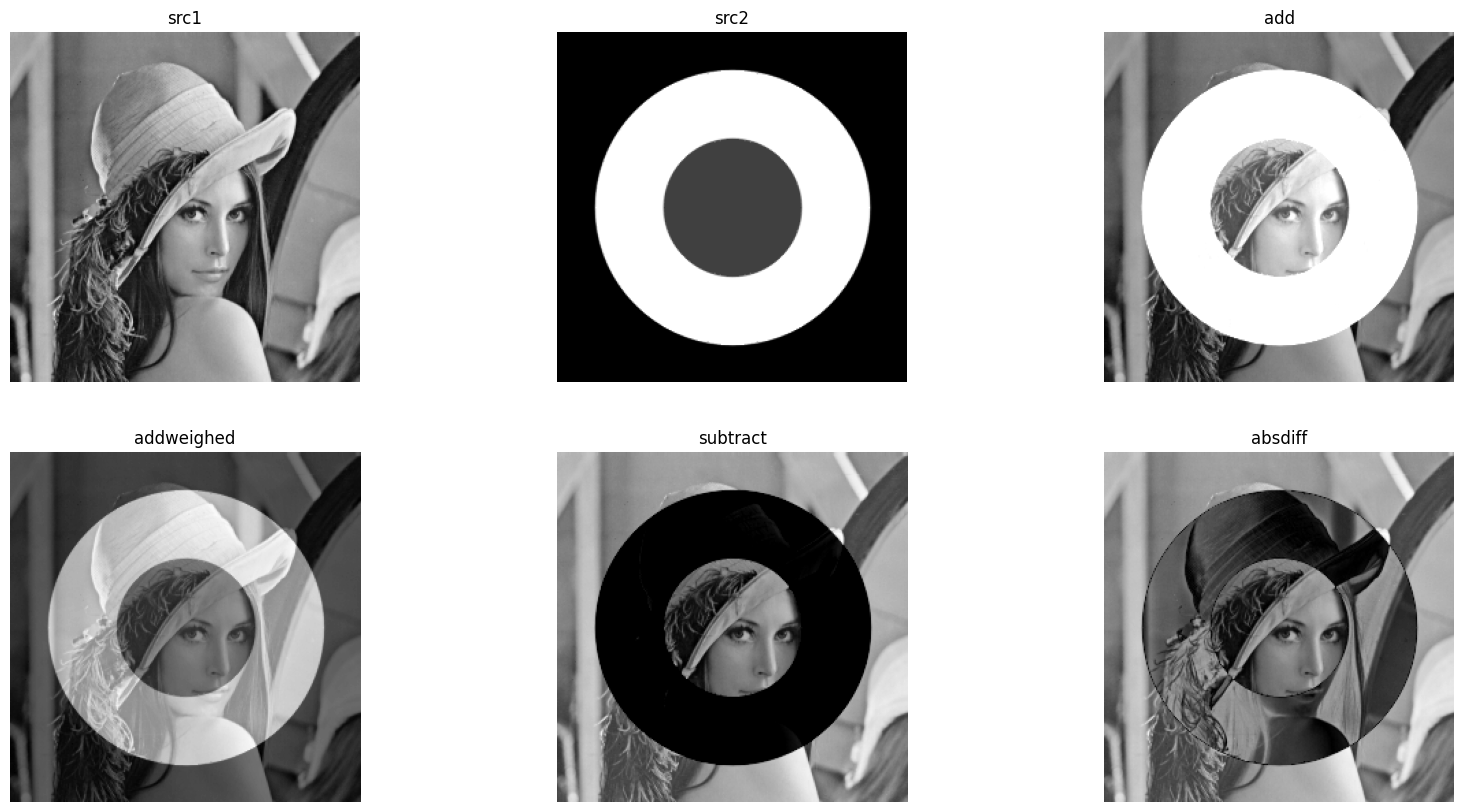

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src1 = cv2.imread('lenna256.bmp', 0) #사이즈 바꿔놓은거
src2 = np.zeros_like(src1, np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1,cv2.LINE_AA)
cv2.circle(src2, (128, 128), 50, 50, -1,cv2.LINE_AA)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0][0].imshow(src1, cmap='gray'), ax[0][0].axis('off'), ax[0][0].set_title('src1')
ax[0][1].imshow(src2, cmap='gray'), ax[0][1].axis('off'), ax[0][1].set_title('src2')
ax[0][2].imshow(dst1, cmap='gray'), ax[0][2].axis('off'), ax[0][2].set_title('add')
ax[1][0].imshow(dst2, cmap='gray'), ax[1][0].axis('off'), ax[1][0].set_title('addweighed')
ax[1][1].imshow(dst3, cmap='gray'), ax[1][1].axis('off'), ax[1][1].set_title('subtract')
ax[1][2].imshow(dst4, cmap='gray'), ax[1][2].axis('off'), ax[1][2].set_title('absdiff')

plt.show()
cv2.waitKey()
cv2.destroyAllWindows()


In [40]:
#이미지에서 bgr 분리할때는 cv2.split(src)
#@@@@@@@@BGR2HSV HSV수정 HSV2VGR
src=cv2.imread('flowers.jpg',1)
src_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)ㅗㅎ
# HSV다른방법으로 따는방법
# h = src_hsv[:,:,0]
# s = src_hsv[:,:,1]
# v = src_hsv[:,:,2]
#스플릿해서 하나만 하는방법
h,s,v=cv2.split(src_hsv)
b,g,r=cv2.split(src)
r_=cv2.add(r,50) # red 알파값 올리기
v_=cv2.add(v,50) # 
dst1=cv2.merge((b,g,r_))

dst2=cv2.merge((h,s,v_))
dst2=cv2.cvtColor(dst2,cv2.COLOR_HSV2BGR)
# cv2.imshow('flowers',src)
# cv2.imshow('b',b)
# cv2.imshow('g',g)
# cv2.imshow('r',r_)
# cv2.imshow('dst1',dst1)
cv2.imshow('src_hsv',src_hsv)
cv2.imshow('h',h)
cv2.imshow('s',s)
cv2.imshow('v',v)
cv2.imshow('dst2',dst2)

cv2.waitKey()
cv2.destroyAllWindows()

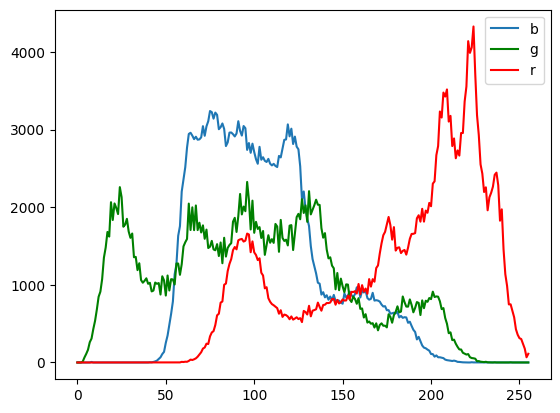

In [48]:
src=cv2.imread('lenna.bmp',1)


hist_b = cv2.calcHist([src],[0],None,[256],[0,256]) #히스토그램 사이즈는 256 마스크는none이고
hist_g = cv2.calcHist([src],[1],None,[256],[0,256]) #히스토그램 사이즈는 256 마스크는none이고
hist_r = cv2.calcHist([src],[2],None,[256],[0,256]) #히스토그램 사이즈는 256 마스크는none이고
plt.plot(hist_b,label='b')
plt.plot(hist_g,label='g',color='green')
plt.plot(hist_r,label='r',color='red')
plt.legend(loc='best')
plt.show()
cv2.imshow('lenna',src)
cv2.waitKey()
cv2.destroyAllWindows()

In [64]:
src=cv2.imread('fig2/manjang.jpg',0)
#흑백인 src input 추출
Imin,Imax,_,_=cv2.minMaxLoc(src)
#out 블랙만 찍는거
# dst_norm = np.clip((src-Imin)*255/(Imax-Imin)+0,0,255).astype(np.uint8) #직접연산을할때는 clip을해서 0,255를 지정해줘야한다.
dst_norm = cv2.normalize(src,None,0,255,cv2.NORM_MINMAX)
dst_equal=cv2.equalizeHist(src)
cv2.imshow('dst_norm',dst_norm)
cv2.imshow('dst_equal',dst_equal)
# print(Imin,Imax)
cv2.imshow('manjanggul',src)
cv2.waitKey()
cv2.destroyAllWindows()

In [73]:
import cv2
import numpy as np

src = cv2.imread('fig2/spring_in_park.jpg',cv2.IMREAD_REDUCED_COLOR_2)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)


v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)  
v_equal = cv2.equalizeHist(src)  


v_norm = cv2.merge((h, s, v_norm))
v_equal = cv2.merge((h, s, v_norm))

# Convert the image back to BGR color space
img_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

# Display the original and the modified image
cv2.imshow('Original', img)
cv2.imshow('Modified', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [45]:
import cv2
# src=cv2.imread('fig2/palette.png')
src=cv2.imread('fig2/palette_dark.png')
src_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
dst1=cv2.inRange(src,(0,0,100),(200,200,200))
dst2=cv2.inRange(src_hsv,(110,200,155),(113,255,160))
cv2.imshow('palette',src)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [54]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('fig2/palette_dark.png')

# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for blue color in HSV
lower_blue = np.array([90, 0, 0])
upper_blue = np.array([120, 255, 255])

# Threshold the image to extract only blue color
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Apply the mask to the original image to extract only blue color
blue_only = cv2.bitwise_and(img, img, mask=mask)

# Display the original and the blue only images
cv2.imshow('Original', img)
cv2.imshow('Blue Only', blue_only)
cv2.waitKey(0)
cv2.destroyAllWindows()
